In [135]:
df=pd.read_csv('./emails.csv')
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [136]:
df.shape

(5728, 2)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5728 non-null   object
 1   Spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [138]:
df.isnull().sum()

Text    0
Spam    0
dtype: int64

In [139]:
df['Text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [140]:
df['Text'][1]

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [141]:
df['Text'][2]

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

In [142]:
df.groupby('Spam').describe()

Text                                                               
     count unique                                                top freq
Spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [143]:
df['Spam'].value_counts()

0    4360
1    1368
Name: Spam, dtype: int64

In [144]:
df_notspam=df[df['Spam']==0]
df_spam=df[df['Spam']==1]

In [145]:
df_notspam.shape

(4360, 2)

In [146]:
df_spam.shape

(1368, 2)

In [147]:
df_notspam_ds=df_notspam.sample(df_spam.shape[0])
df_notspam_ds.shape

(1368, 2)

In [148]:
df_balanced=pd.concat([df_spam,df_notspam_ds])
df_balanced.sample(4)

,Text,Spam
508,Subject: let the tba doctor save your tough ca...,1
2946,Subject: energy book vl . 0 vince : i have r...,0
813,Subject: you want to submit your website to se...,1
1023,Subject: i missed you 24632 if amateurs is wh...,1


In [149]:
df_balanced.shape

(2736, 2)

In [150]:
# Remove special characters and punctuations

In [151]:
df_balanced['Text']=df_balanced['Text'].str.lower()
df_balanced.head()

,Text,Spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [152]:
df_balanced['Text']=df_balanced['Text'].str.replace('[^a-z0-9\s]','')
df_balanced['Text']=df_balanced['Text'].str.replace('\n','')
df_balanced['Text']=df_balanced['Text'].str.replace('\s+',' ')
df_balanced.head()

,Text,Spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject do not have money get software cds fro...,1


In [153]:
stop=stopwords.words('english')
df_balanced['Text']=df_balanced['Text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df_balanced.head()

,Text,Spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1


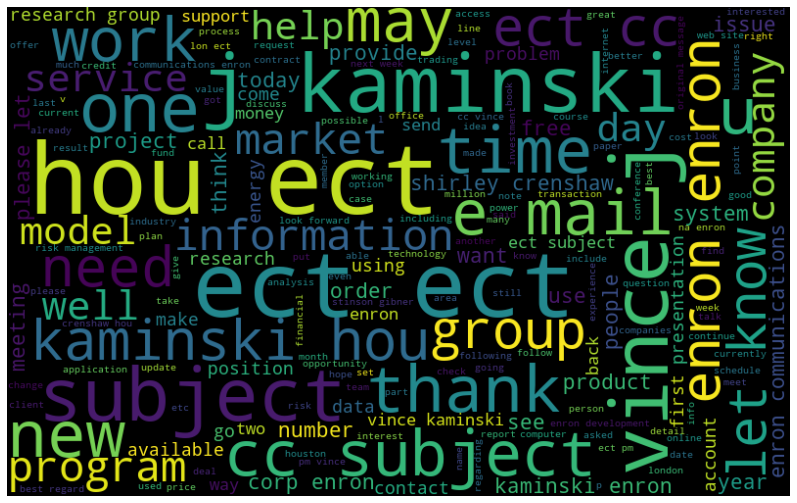

In [154]:
# Visualize the frequent words
all_words=" ".join([sentence for sentence in df_balanced['Text']])
wordcloud=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(all_words)

# Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

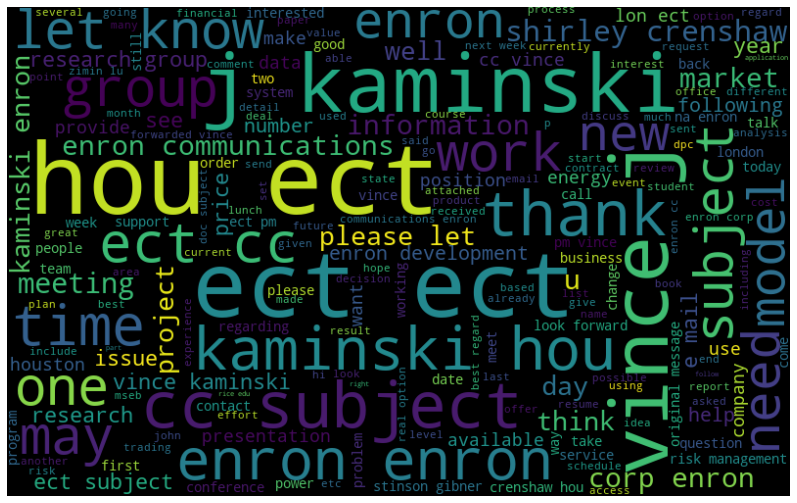

In [155]:
# Visualize the frequent word for ham emails
all_words_ham=" ".join([sentence for sentence in df_balanced['Text'][df['Spam']==0]])
wordcloudham=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(all_words_ham) 

# Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloudham,interpolation='bilinear')
plt.axis('off')
plt.show()

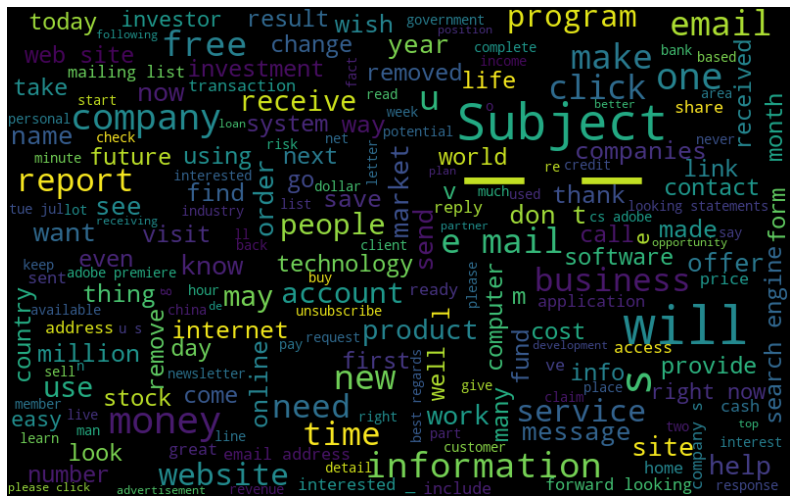

In [156]:
# Visualize frequent words in spam emails
all_words_spam=" ".join([sentence for sentence in df['Text'][df['Spam']==1]])
wordcloud_spam=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(all_words_spam)

# Plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud_spam,interpolation='bilinear')
plt.axis('off')
plt.show()

In [157]:
# Tokenize text
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_balanced['Text'])
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

28759

In [158]:
word_index['please']

6

In [159]:
word_index['time']

17

In [160]:
# Padding data
sequences=tokenizer.texts_to_sequences(df_balanced['Text'])
padded_seq=tf.keras.utils.pad_sequences(sequences,maxlen=700,padding='post',truncating='post')

In [161]:
padded_seq[2000]

array([    2,   181,   194,   507,   785,  2597,   993,    23,    47,
          21,   776,   198,   938,   503,    38,  1420,   534,  4210,
         145,    85,   202,   300,   262,   622,   740,   198,    48,
         461,   225,   756,    45,  1957,   255, 14669,  1574,     4,
         507,  4231,    82,   248,    11,   115,   416,  1042,     4,
          14,    10,     1,     5,    15,  2578,  2579,     2,   181,
         194,     4,  2648,    17,  1906, 14670,    61,  1925,   285,
         570,  1497,  1220,   251,   669,   225,   740,   181,   194,
          90,   354,    23,    47,  5088,   740,    20,    59,    92,
          59,    60,   387,    96,  1094,   261,    17,   225,  2578,
        2579,  1273,   503,    31,   740,    92,    37,    59,  1984,
        1344,   855,   505,   448,   476,   181,   194,  3344,   167,
         293,   819,   669,     9,   400,   387,   534,   354,   353,
        1420,     9,    45,  3842,  1121,   622,   354,  1379,  1574,
         145,   169,

In [162]:
with open('glove.6B.100d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        print(values)
        break

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [163]:
# Creating embedding index
embedding_index={}
with open('glove.6B.100d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:],dtype='float32')
        embedding_index[word]=coefs

In [164]:
embedding_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [165]:
# Create embedding matrix
embedding_matrix=np.zeros((vocab_size+1,100))
for word,i in word_index.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [166]:
embedding_matrix[1]

array([ 6.13529980e-01,  3.19009982e-02,  5.07990003e-01, -1.44950002e-02,
        2.09849998e-02, -7.66439974e-01, -1.64130002e-01, -3.46069992e-01,
       -6.75960004e-01, -4.09270003e-02,  1.39069998e+00,  5.40639997e-01,
        7.89320022e-02,  3.84640008e-01, -1.43200004e+00, -9.64510024e-01,
        4.39429998e-01,  1.02250004e+00,  1.96140006e-01,  6.03599995e-02,
       -3.30040008e-01, -3.26510012e-01,  1.92739993e-01,  4.43670005e-01,
       -7.69460022e-01, -5.49720004e-02, -5.60670018e-01,  1.07889998e+00,
       -8.32050025e-01,  1.44299999e-01,  1.66999996e+00,  5.61360002e-01,
       -4.32309985e-01, -1.10200000e+00, -1.60870004e+00, -2.63639987e-01,
        5.11020005e-01, -1.58209994e-01,  9.83560026e-01,  2.92290002e-02,
       -2.56889999e-01, -5.70029974e-01,  3.55879992e-01, -8.20179994e-04,
       -6.69669986e-01,  4.14810002e-01,  1.84369996e-01, -2.47189999e-01,
        1.31760001e-01, -8.95789981e-01, -6.98259994e-02, -9.31740031e-02,
        2.71250010e-01,  

In [167]:
padded_seq[1]

array([    2,   221,   138, 15583, 15584,  5532, 15585, 11493, 15586,
       15587,    36, 15588, 15589, 15590, 15591,    38,   466, 15592,
        7243, 15593,   606, 15594, 15595, 15596, 15597, 11494,  4259,
        9458, 15598, 15599,    36, 15600, 15601,  2515, 15602, 15603,
         466,  2319,  3168, 15604,   606, 15605, 15606, 15607, 15608,
       15609,  2955,  3678, 15610, 15611,    36, 15612, 15613, 15614,
       15615,  8146,   466,  3679, 15616, 15617,   606, 15618,  4514,
       11495,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [168]:
X_train,X_test,y_train,y_test=train_test_split(padded_seq,df_balanced['Spam'],test_size=0.2,random_state=101,
                                              stratify=df_balanced['Spam'])

In [175]:
X_train[1500]

array([    2,  1696,   683,    57,   132,  4905, 11308,     4,  1696,
         683, 26320,  4986,  1191,  2270,  2287,  2175,  5243,    57,
        9774,     9,   290,    42,   530,   528,  5634,  5243,     9,
        2175,  5243,    57,  1462,    26,  2270,   444,  1814,  1176,
         149,   670,   542,  2175,    57,    55,   661,  1280,  5928,
        2164,  1051,  5634,    98,     9, 12747,   495,    57,  3362,
        2270, 26321,  5247,  1176,   149,   466,   501,  5656,  4986,
         439,  2265,  1041,   555,   548,    16,  2469,   186,   122,
        6581,  4733,  2265,  1129,  2882,   804,  7672,   501,  1761,
         305,   132,  2163,  1041,   186,  2175,   132,   804,   121,
        1237,   796,  4986, 26322,  2050,   355,  2378,   859,   275,
          70,   265,  2265,    32,   132,    94,    26,  1795,  1110,
        3205,  2593,   328,   435,  1218,  1041,  2175,    24,   986,
         415,   535,  4156,   355,  2378, 26323,   132,   131,   796,
        1041,  2175,

In [183]:
y_train[0]

1

In [184]:
y_train.value_counts()

0    1094
1    1094
Name: Spam, dtype: int64

In [185]:
X_train.shape

(2188, 700)

In [186]:
y_test.value_counts()

0    274
1    274
Name: Spam, dtype: int64